In [2]:
import json
import random

plan = "fm2_llama3.1_8b_50instances_seed0"
uids = 10
queue_data = []
for uid in range(uids):
    queue_data.append(json.load(open(f"../web/baked_queues/{plan}_{uid:0>3}.json")))
print(f"Loaded {len(sum(queue_data, []))} claim-assistance pairs")

Loaded 500 claim-assistance pairs


% positive labels: 0.34
% positive predictions: 0.6
% correct predictions: 0.7


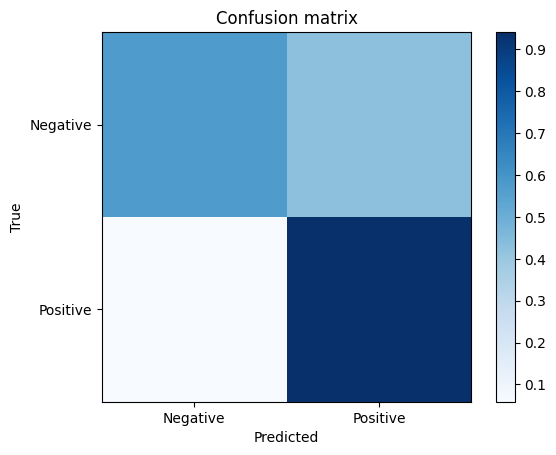

In [5]:
llm_predictions = [x['llm_prediction'] for x in sum(queue_data, [])]
gt_labels = [x['gt_label'] for x in sum(queue_data, [])]
llm_correctness = [x['llm_is_correct'] for x in sum(queue_data, [])]
print(f"% positive labels:", sum(gt_labels) / len(gt_labels))
print(f"% positive predictions:", sum(llm_predictions) / len(llm_predictions))
print(f"% correct predictions:", sum(llm_correctness) / len(llm_correctness))

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

cm = confusion_matrix(gt_labels, llm_predictions)
cm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [6]:
confusion_matrix(gt_labels, llm_predictions)

array([[190, 140],
       [ 10, 160]])